In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-10,10,50)#Creamos un espacio de intervalo uniforme
y=2*x**2 +3*x +5*np.random.normal(0,4,size=len(x)) #Lo ajustamos a una funcion para una distribucion especial de los datos
print(x)


[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ]


In [3]:
print(y)

[170.57456979 155.67788955 140.61748872 110.54707094 119.17422582
 100.43618953 106.20156076  74.03706188  83.0179192   56.78019568
  47.6021195   52.37738971  22.77754966  16.06924565  25.53565667
  19.34828189  25.46916935  23.98796568 -15.58206462  -1.14914369
  18.98554343  -1.18501629  28.73501683 -23.06157375 -11.62044196
  -7.84530952   9.27932221 -13.66622445   5.92735776  14.23444724
  22.10980082  24.8148301    2.64478792  26.88547651  48.66317998
  59.42556959  63.52831811  48.70576073 103.71167597  76.04702572
  97.99604632 111.61207603  96.63807696  85.86765026 179.12424615
 162.81339974 162.08282473 195.23601073 183.79386662 234.32826714]


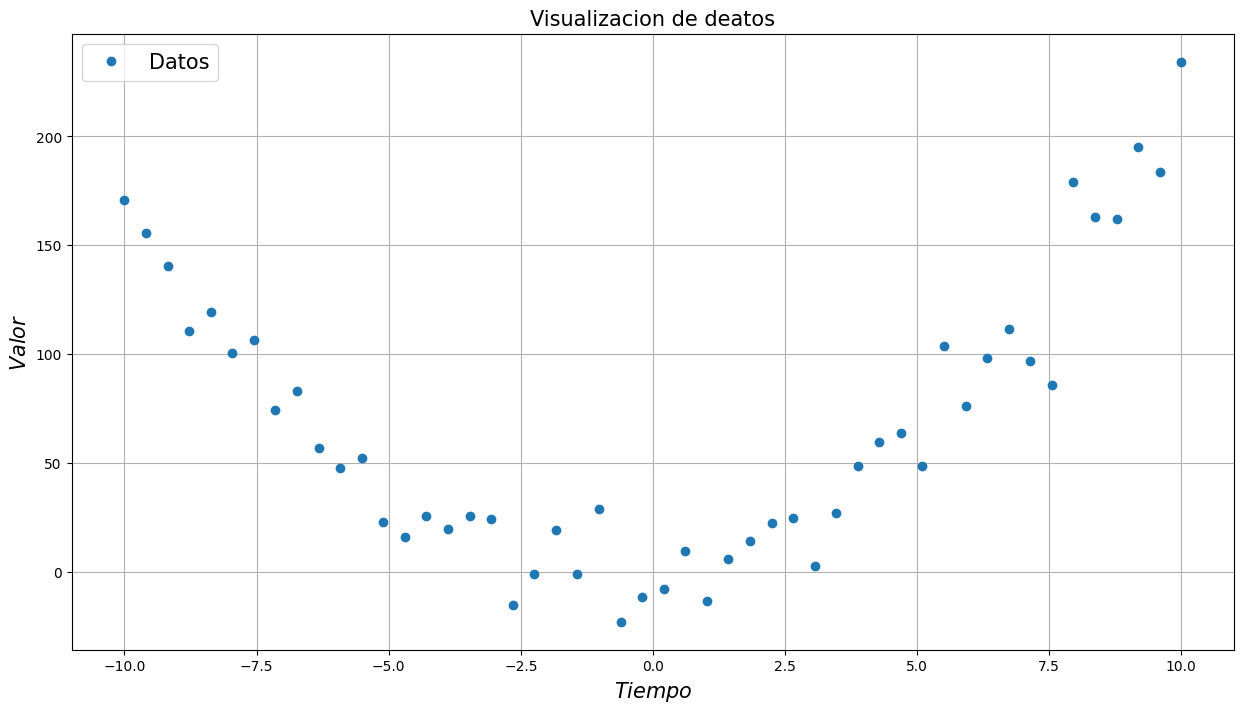

In [4]:
plt.figure(figsize=(15,8))
plt.title("Visualizacion de deatos",fontsize=15)
plt.plot(x,y,'o')
plt.legend(["Datos"],fontsize=15)
plt.xlabel("$Tiempo$",fontsize=15)
plt.ylabel("$Valor$",fontsize=15)#Graficamos como quedaron los datos
plt.grid()
plt.show()

In [5]:
model=keras.Sequential(keras.layers.Dense(units=1,input_shape=(1,)))#Usamos un perceptron simple
model.compile(optimizer='sgd',loss="mean_squared_error")#Usamos el descenso de gradiente estocástico y el error cuadrado medio
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)#Aquí quise imprimir pero no pude instalar la libreria que pide

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [7]:
model.fit(x,y,epochs=10)#Hacemos fit de los datos en una sola epoca


Epoch 1/10

2/2 [==============================] - 1s 8ms/step - loss: 8482.9346
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 7994.3599
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 7846.8794
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 8135.9639
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 7562.9507
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 6859.5298
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 7401.4639
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 7749.1763
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 6599.4580
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 5933.6904


In [8]:
w=model.get_weights()
print(w)
print("\nObjeto Pesos:" , w)
print("Number of weights "+str(len(w)))
print("\nw= "+ str(w[0][0])+"(Weight)")
print("b = "+str(w[1])+" Weight->bias")


[array([[2.5255108]], dtype=float32), array([22.97663], dtype=float32)]

Objeto Pesos: [array([[2.5255108]], dtype=float32), array([22.97663], dtype=float32)]
Number of weights 2

w= [2.5255108](Weight)
b = [22.97663] Weight->bias


In [9]:
predict=model.predict(x)#Predecimos valores a lo largo de nuestro espacio


2/2 [==============================] - 0s 2ms/step


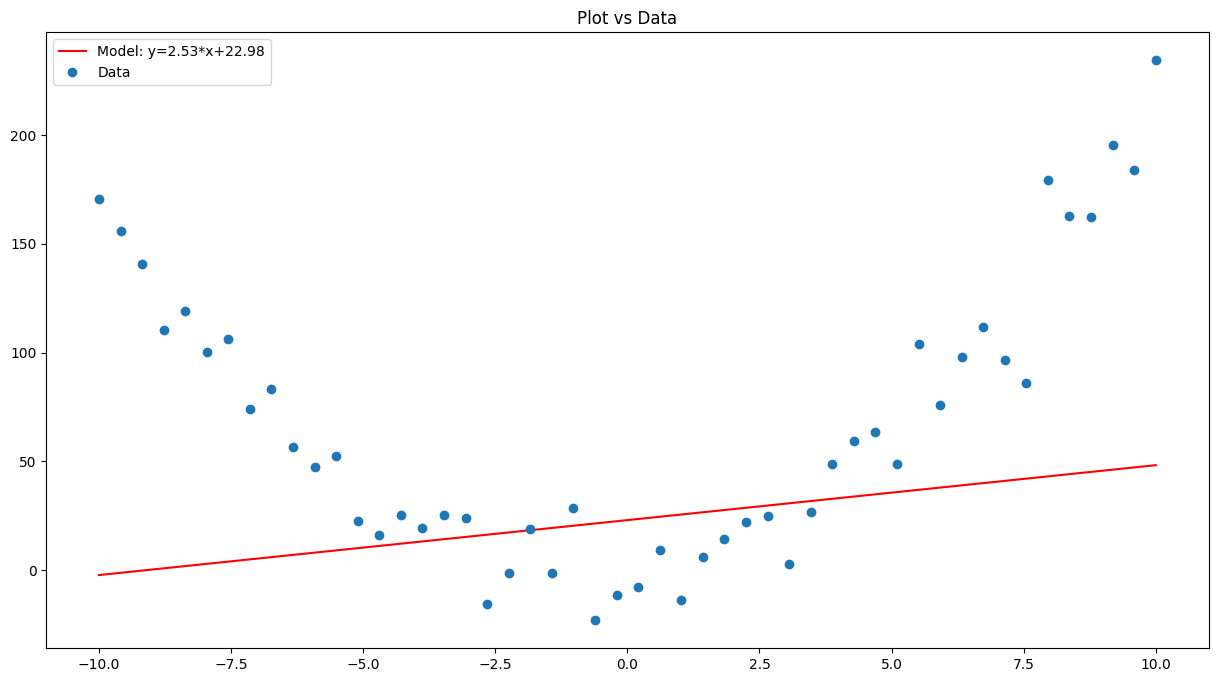

In [10]:
plt.figure(figsize=(15,8))
plt.plot(x,predict,'r-',label="Model: y={:.2f}*x+{:.2f}".format(w[0].item(),w[1].item()))
plt.plot(x,y,'o',label="Data")
plt.title("Plot vs Data")
plt.legend(loc=0)
plt.show()#Se produce una linea recta ya que es un perceptrón simple

In [11]:
model2=tf.keras.Sequential([#Hacemos una red densa de 3 capas con varias neuronas por capa
    keras.layers.Dense(units=5,input_shape=(1,),activation='softplus'),
    keras.layers.Dense(units=10,activation='softplus'),
    keras.layers.Dense(units=20,activation='softplus'),
    keras.layers.Dense(units=1)#Al final una neurona de salida que nos va a decir su valor
    
])
model2.compile(optimizer='adam',loss='mean_squared_error')#Compilamos con optimizador adam y perdida de error cuadrado medio
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 311 (1.21 KB)
Trainable params: 311 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history=model2.fit(x,y,epochs=3000,verbose=0)#Entrenamos el modelo y guardamos el historial
w2=model2.get_weights()
print(w2)
print("\nObjeto Pesos:" , w2)
print("Number of weights "+str(len(w2)))
print("\nw= "+ str(w2[0][0])+"(Weight)")
print("b = "+str(w2[1])+" Weight->bias")

[array([[-1.2987841 ,  0.01201081,  1.0980227 ,  1.202331  ,  1.3124598 ]],
      dtype=float32), array([-0.09490759,  0.98583764, -0.32620916, -0.37853768, -0.5185773 ],
      dtype=float32), array([[ 0.79928714, -0.5101649 ,  1.1741977 ,  0.3530279 , -0.04751596,
        -0.02220921,  0.9466732 , -0.23185919,  0.40268856,  0.6103346 ],
       [ 0.12020937,  0.29290995, -0.5403925 , -0.27384883,  0.8806872 ,
         1.9701223 , -1.1939797 ,  0.30197516, -0.3008651 , -0.6911546 ],
       [-0.4539379 ,  0.47204334,  0.14636362,  0.8974513 , -0.36377403,
         0.5084656 , -0.8855824 ,  0.7018154 ,  0.5629761 ,  0.06808373],
       [-0.42274866,  0.9059929 ,  0.57514834,  0.95298344, -0.02389994,
        -0.01800855, -1.1455972 ,  0.27978215, -0.24290197,  0.8002925 ],
       [ 0.24337833,  0.5455328 ,  0.32431254,  0.4043392 ,  0.30571523,
        -0.43726507, -1.1356946 ,  0.22143675,  0.49201643,  0.32654667]],
      dtype=float32), array([-0.08807944, -0.4464102 , -0.2661761 , -0.

10/10 [==============================] - 0s 815us/step


<function matplotlib.pyplot.show(close=None, block=None)>

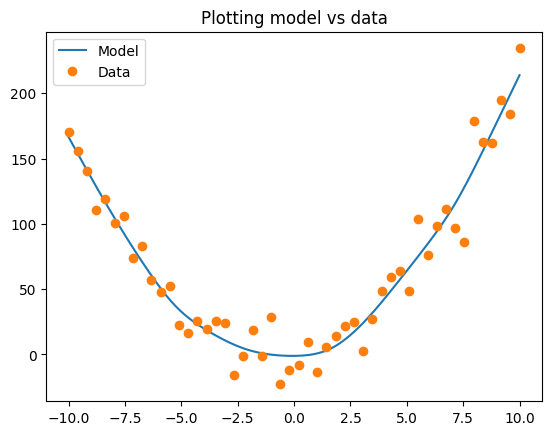

In [13]:
x_test=np.linspace(x[0],x[-1],300) #Hacemos un espacio uniforme de prueba
predict=model2.predict(x_test)
plt.plot(x_test,predict,label="Model")
plt.plot(x,y,'o',label="Data")
plt.title("Plotting model vs data")#Graficamos como quedó la predicción respecto a los datos
plt.legend(loc=0)
plt.show

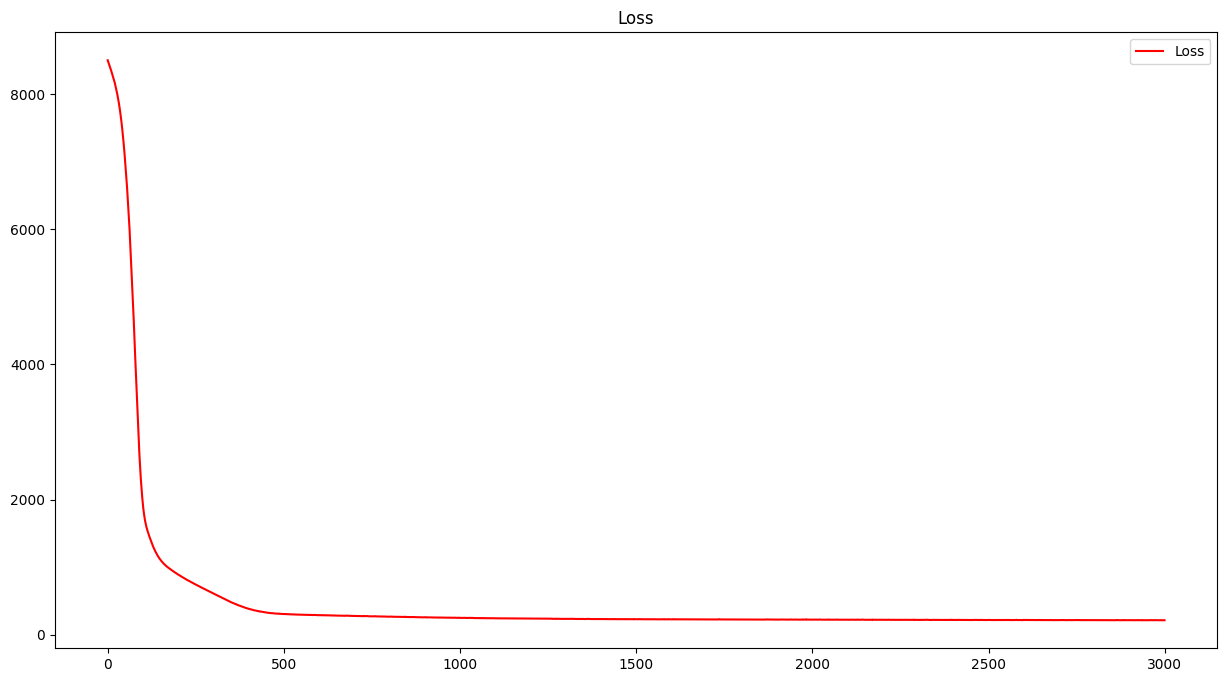

In [14]:
plt.figure(figsize=(15,8))
plt.plot(history.history["loss"],"r-",label="Loss")#Graficamos la perdida del modelo a lo largo de las epocas
plt.title("Loss")
plt.legend(loc=0)
plt.show()